# Centrality Measures in Network Science
#### Author: [Erika Fille Legara](http://erikalegara.site)


[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://github.com/eflegara/Network-Science-Lectures/blob/master/LICENSE.md)

For context, this notebook is accompanied by a lecture session under the Network Science course under [AIM's MSc in Data Science program](https://aim.edu/programs/degree-programs/master-science-data-science).

---

<table align="left" border=0>
<!-- <table class="tfo-notebook-buttons" align="left"> -->
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/eflegara/Network-Science-Lectures/blob/master/Centrality%20Measures.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/eflegara/Network-Science-Lectures/blob/master/Centrality%20Measures.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>


---

## Description

In this notebook, we explore the different meanings of network "centrality". Depending on the context and the complex network one is studying, the central nodes for exactly the same network can mean really different things. Here, we explore four kinds of centrality measures:

1. **Degree Centrality** - centrality depends on the degree of node (number of neighbors)
2. **Closeness Centrality** - centrality depends on the distance of a node to all other nodes in the network
3. **Betweenness Centrality** - centrality depends on how many all pairs shortest paths would pass through a given node
4. **Eigenvector Centrality** - centrality depends on the relative scores of neighboring nodes (or how "famous" ones neighboring nodes are); the more high-scoring nodes an entity is connected to, the higher its centrality is. 


Centrality measures are critical in a wide-range of applications that involve concepts/phenomena such as infrastructure vulnerability and robustness (e.g., in transportation systems, urban systems, the Internet, etc.) and spreading or flow (of information or diseases, etc.), to name two. Essentially, it's about identifying the "important" or "influential" nodes in the system.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Create Arbitrary Graph G

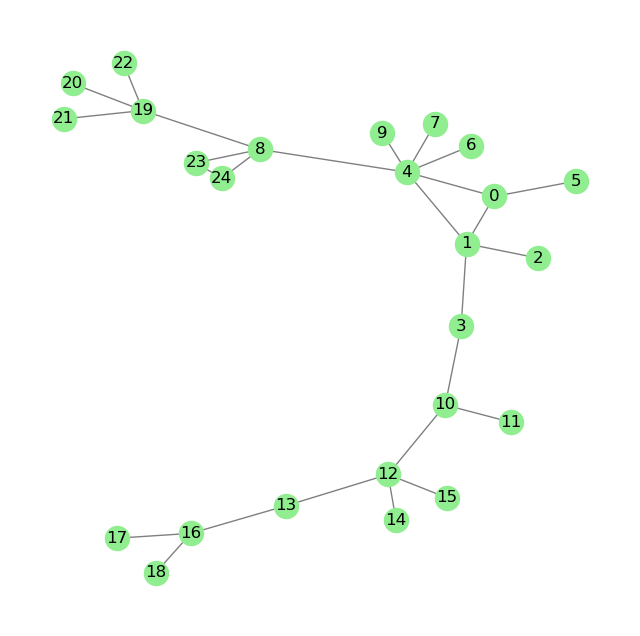

In [2]:
G = nx.Graph()

G.add_edges_from([(0,1),(0,4),(0,5),(1,3),(1,2),
                  (1,4), (4,6), (4,7), (4,8), (4,9), 
                  (3,10), (10,11), (10,12), (12,13), 
                  (12,14), (12,15), (13,16), (16, 17), 
                  (16, 18), (8,19), (19, 20), (19,21), 
                  (19,22), (8,23), (8,24), (23,24)])
pos = nx.fruchterman_reingold_layout(G);

plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightgreen");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color='black');
plt.show();

Observe how the central nodes vary depending on the measure we're using.

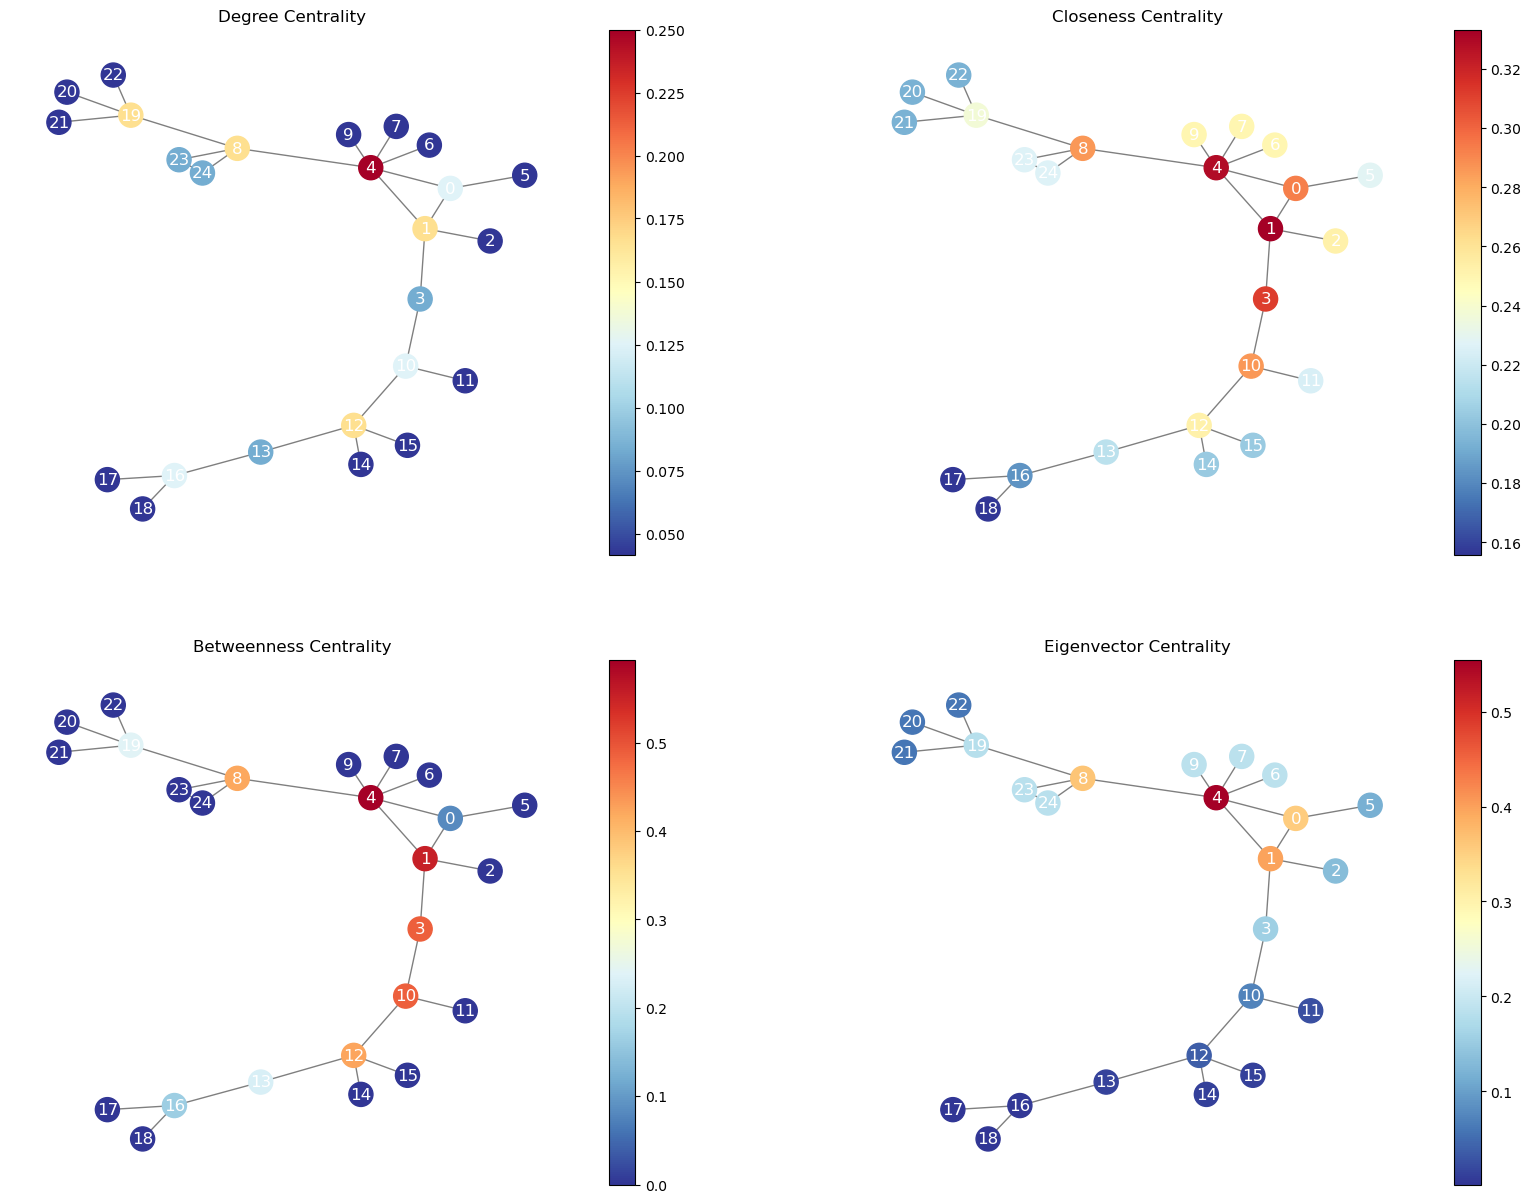

In [3]:
fig = plt.figure(figsize=(20,15));

centralities = [list(nx.degree_centrality(G).values()), 
                list(nx.closeness_centrality(G).values()), 
                list(nx.betweenness_centrality(G).values()),
                list(nx.eigenvector_centrality(G).values())]
titles = ['Degree Centrality', 'Closeness Centrality', 
          'Betweenness Centrality', 'Eigenvector Centrality']

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1);
    nc = nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                            node_color=centralities[i]);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    nx.draw_networkx_labels(G, pos, font_color='white');
    plt.title(titles[i]);
    plt.axis('off');
    plt.colorbar(nc);

plt.show();

Any insights you can share from the results above?

# Florentine families

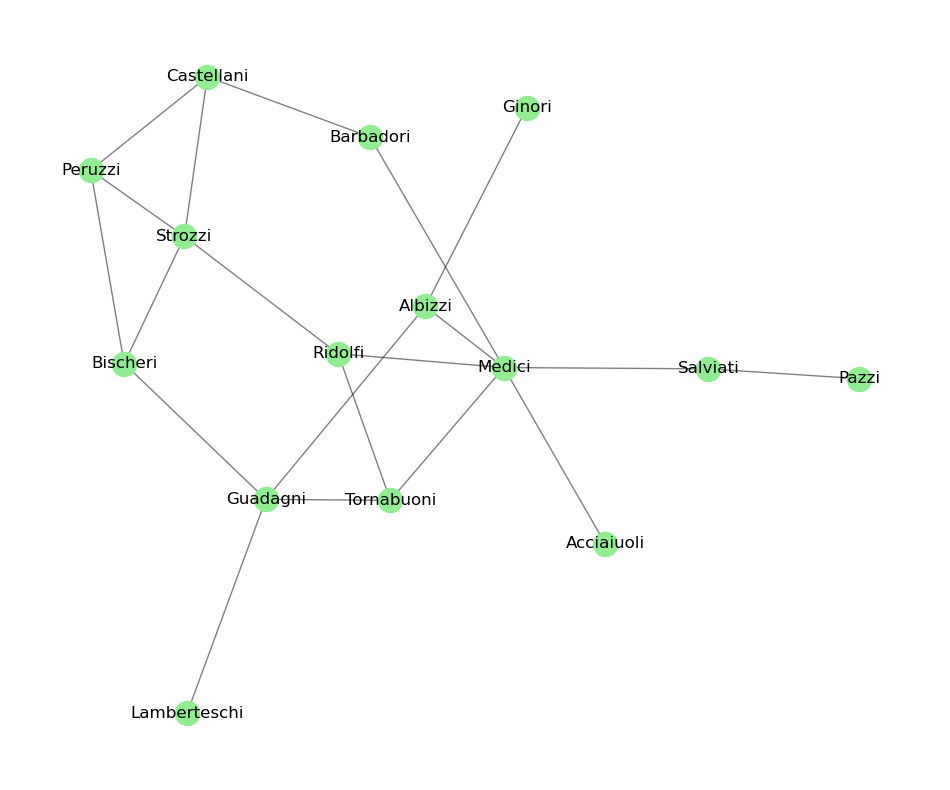

In [4]:
F = nx.florentine_families_graph() 
pos = nx.fruchterman_reingold_layout(F);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(F, pos, node_size=300, node_color="lightgreen");
nx.draw_networkx_edges(F, pos, alpha=0.500);
nx.draw_networkx_labels(F, pos, font_color='black');
plt.show();

### Degree Centrality

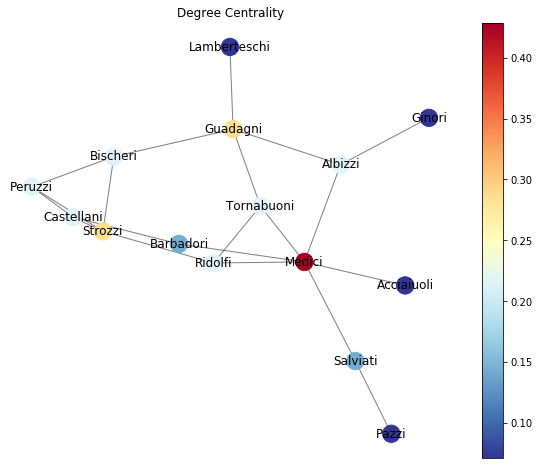

In [5]:
plt.figure(figsize=(10,8));
plt.axis("off");

nc = nx.draw_networkx_nodes(F, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                            node_color=list(nx.degree_centrality(F).values()));
nx.draw_networkx_edges(F, pos, alpha=0.500);
nx.draw_networkx_labels(F, pos, font_color="black");

plt.title('Degree Centrality');
plt.colorbar(nc);

### Closeness Centrality

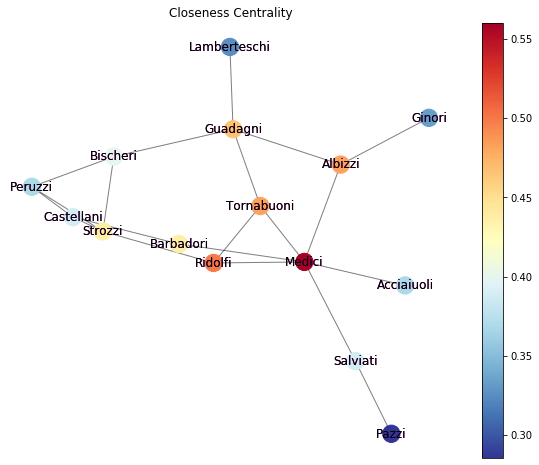

In [6]:
plt.figure(figsize=(10,8));
plt.axis("off");
nc = nx.draw_networkx_nodes(F, pos, node_size=300, cmap=plt.cm.RdYlBu_r, 
                       node_color=list(nx.closeness_centrality(F).values()));
nx.draw_networkx_edges(F, pos, alpha=0.500);
nx.draw_networkx_labels(F, pos, font_color="purple");
nx.draw_networkx_labels(F, pos, font_color='black');

plt.title('Closeness Centrality');
plt.colorbar(nc);

### Betweenness Centrality

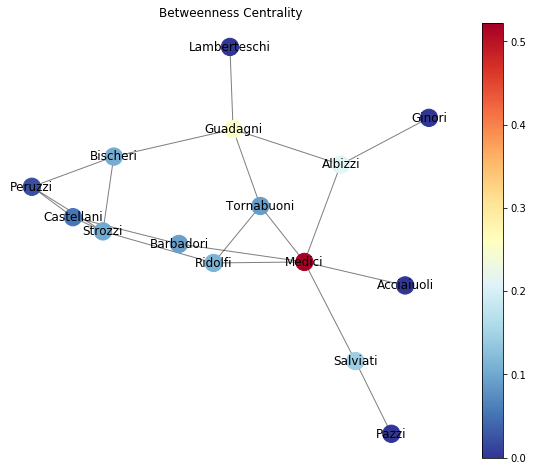

In [7]:
plt.figure(figsize=(10,8));
plt.axis("off");
nc = nx.draw_networkx_nodes(F, pos, node_size=300, cmap=plt.cm.RdYlBu_r, 
                       node_color=list(nx.betweenness_centrality(F).values()));
nx.draw_networkx_edges(F, pos, alpha=0.500);
nx.draw_networkx_labels(F, pos, font_color='black');

plt.title('Betweenness Centrality');
plt.colorbar(nc);

### EigenVector Centrality

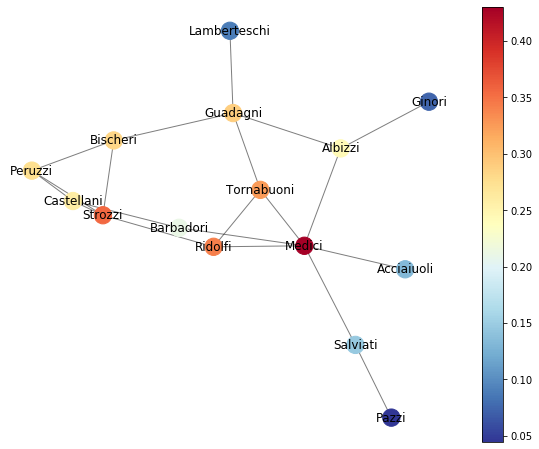

In [8]:
plt.figure(figsize=(10,8));
plt.axis("off");
nc = nx.draw_networkx_nodes(F, pos, node_size=300, cmap=plt.cm.RdYlBu_r, 
                       node_color=list(nx.eigenvector_centrality(F).values()));
nx.draw_networkx_edges(F, pos, alpha=0.500);
nx.draw_networkx_labels(F, pos, font_color='black');
plt.colorbar(nc);

# Karate Club

In [9]:
K = nx.karate_club_graph()

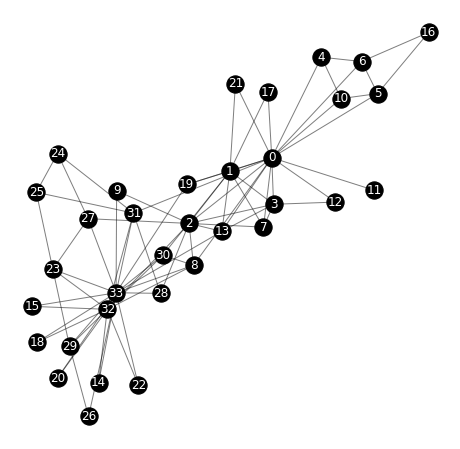

In [10]:
pos = nx.fruchterman_reingold_layout(K);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");


plt.show();

### Degree Centrality

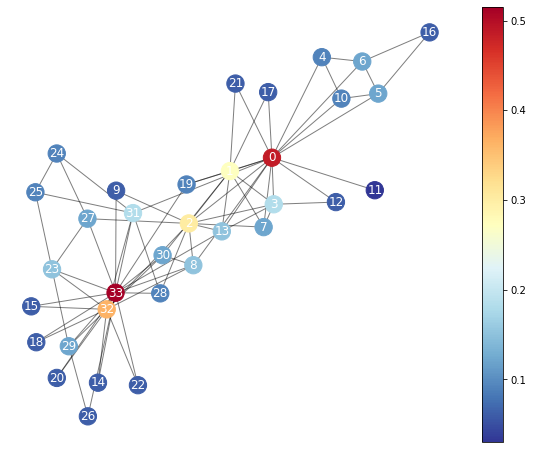

In [11]:
plt.figure(figsize=(10,8));
plt.axis("off");
nc = nx.draw_networkx_nodes(K, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                            node_color=list(nx.degree_centrality(K).values()));
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");

plt.colorbar(nc);

### Closeness Centrality

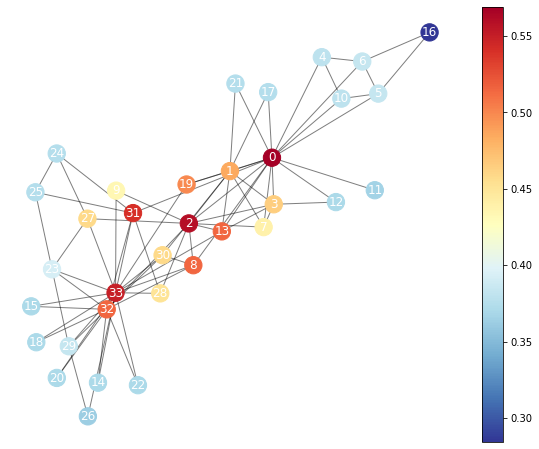

In [12]:
plt.figure(figsize=(10,8));
plt.axis("off");
nc = nx.draw_networkx_nodes(K, pos, node_size=300, cmap=plt.cm.RdYlBu_r, 
                       node_color=list(nx.closeness_centrality(K).values()));
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");

plt.colorbar(nc);

### Betweenness Centrality

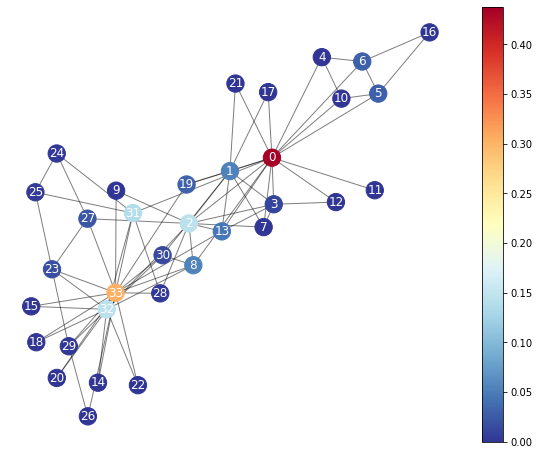

In [13]:
plt.figure(figsize=(10,8));
plt.axis("off");
nc = nx.draw_networkx_nodes(K, pos, node_size=300, cmap=plt.cm.RdYlBu_r, 
                       node_color=list(nx.betweenness_centrality(K).values()));
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");
plt.colorbar(nc);

### Eigenvector Centrality

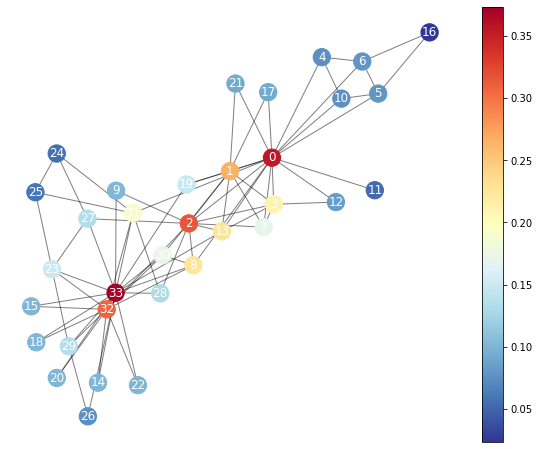

In [14]:
plt.figure(figsize=(10,8));
plt.axis("off");
nc = nx.draw_networkx_nodes(K, pos, node_size=300, cmap=plt.cm.RdYlBu_r, 
                       node_color=list(nx.eigenvector_centrality(K).values()));
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");
plt.colorbar(nc);

## Exercise

1. What can you say about the networks described above (Florentine Families and the Karate Club)? What insights can you extract from the results of looking into the different centrality measures?
2. Check again the MSDS Hangout network. What can you say about the central nodes in the network? Any relevant insights? What does this mean for spread of diseases within the class? How about spread of information? What other interesting dynamics would we observe with the kind of network structure we're seeing?
3. If we're studying traffic flow of Metro Manila, which centrality measure is the most apt to use? Why?